In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
_311_service_requests_bkt = pd.read_csv('../Datathon Materials/311_features_rm_season.csv')

In [141]:
_311_service_requests_bkt

,Unnamed: 0,X_date,Water.System,Dirty.Conditions,Sanitation.Condition,Rodent,Food.Establishment,Air.Quality,Indoor.Air.Quality,Food.Poisoning,Hazardous.Materials,Asbestos,Smoking,Drinking,Water.Quality,month
0,1,2010-01-31,24.00000,-9.657143,20.285714,-18.314286,-11.914286,-7.20000,-1.428571e+00,-0.028571,-0.371429,-0.314286,4.457143,-2.40000,-2.571429,1
1,2,2010-02-28,-97.00000,-53.657143,-37.714286,-41.314286,-23.914286,-4.20000,6.571429e+00,-1.028571,-4.371429,-3.314286,6.457143,-1.40000,-2.571429,1
2,3,2010-03-31,-77.00000,73.342857,27.285714,-17.314286,-4.914286,-1.20000,8.571429e+00,-6.028571,-5.371429,-0.314286,5.457143,-1.40000,-2.571429,1
3,4,2010-04-30,-36.00000,56.342857,11.285714,-0.314286,-3.914286,12.80000,8.571429e+00,-4.028571,2.628571,-0.314286,-2.542857,8.60000,-3.571429,1
4,5,2010-05-31,-205.81250,12.406250,-34.406250,-32.062500,-17.031250,0.65625,1.200000e+01,-7.625000,-7.093750,-3.156250,3.562500,4.78125,-3.343750,2
5,6,2010-06-30,153.18750,-12.593750,-12.406250,-10.062500,-8.031250,10.65625,7.000000e+00,-0.625000,-3.093750,1.843750,-1.437500,2.78125,-1.343750,2
6,7,2010-07-31,644.18750,28.406250,-11.406250,-23.062500,-12.031250,-8.34375,5.000000e+00,-2.625000,-3.093750,9.843750,-3.437500,-3.21875,0.656250,2
7,8,2010-08-31,-19.81250,3.406250,-4.406250,-13.062500,-15.031250,-15.34375,-1.000000e+00,-7.625000,-7.093750,-1.156250,-1.437500,2.78125,-2.343750,2
8,9,2010-09-30,67.71875,19.593750,-2.312500,-9.125000,-4.000000,9.59375,5.000000e-01,-0.531250,-0.562500,-6.406250,-1.375000,7.68750,5.031250,3
9,10,2010-10-31,-7.28125,5.593750,6.687500,-7.125000,6.000000,-17.40625,8.500000e+00,-3.531250,-8.562500,7.593750,-2.375000,1.68750,-0.968750,3


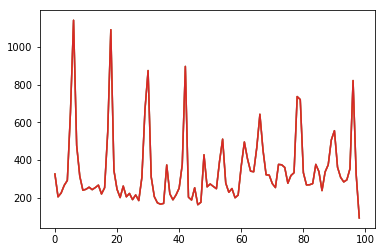

In [22]:
plt.plot(_311_service_requests_bkt['Water System'])
plt.show()

In [143]:
complaint_type = list(_311_service_requests_bkt.keys())[2:-1]
complaint_type

['Water.System',
 'Dirty.Conditions',
 'Sanitation.Condition',
 'Rodent',
 'Food.Establishment',
 'Air.Quality',
 'Indoor.Air.Quality',
 'Food.Poisoning',
 'Hazardous.Materials',
 'Asbestos',
 'Smoking',
 'Drinking',
 'Water.Quality']

In [137]:
signal = _311_service_requests_bkt[_311_service_requests_bkt.columns[1:]].values

In [138]:
signal

array([[326, 162, 142, ...,  17,   2,   4],
       [205, 118,  84, ...,  19,   3,   4],
       [225, 245, 149, ...,  18,   3,   4],
       ..., 
       [822, 217, 170, ...,  15,   2,  10],
       [324, 185, 179, ...,  22,   4,   6],
       [ 93,  59,  54, ...,   4,   7,   0]], dtype=int64)

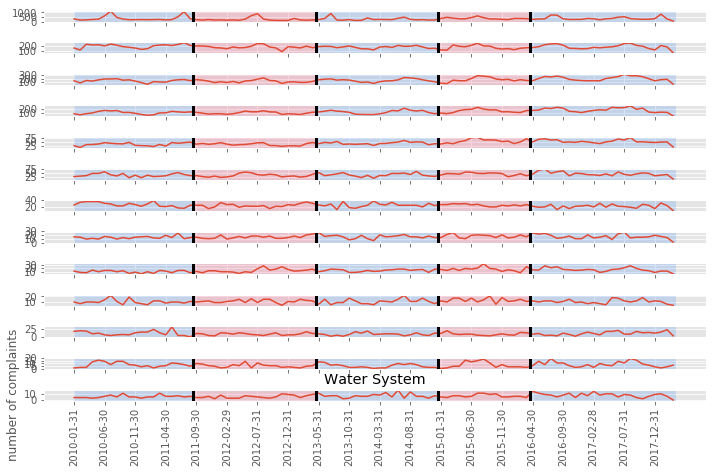

In [139]:
date = _311_service_requests_bkt['_date']

category = complaint_type[0]
# signal = _311_service_requests_bkt[category]

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Dynp(model=model, min_size=10, jump=5).fit(signal)
my_bkps = algo.predict(n_bkps=4)

# show results
rpt.show.display(signal, my_bkps, my_bkps, figsize=(10, 6))
plt.title(category)
plt.ylabel('number of complaints')
plt.xticks(range(0, len(date), 5), [date[i] for i in range(0,len(date),5)], rotation=90)
plt.show()

C:\Users\zjw\Anaconda3\lib\site-packages\ruptures\costs\costl1.py:103: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  self.signal = signal.reshape(-1, 1)


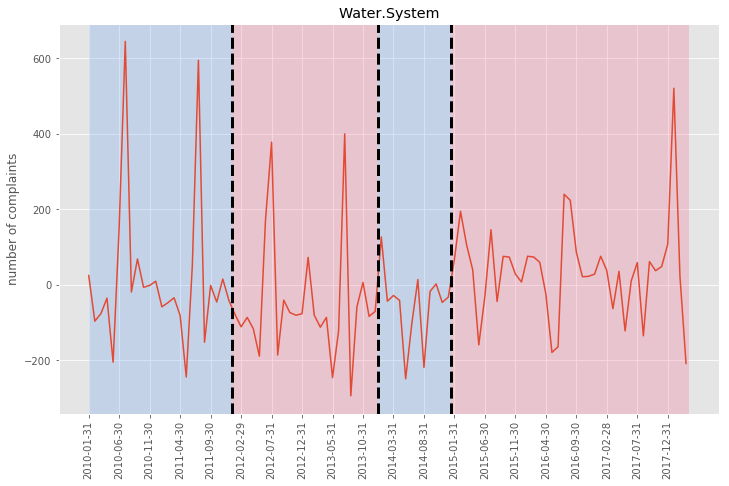

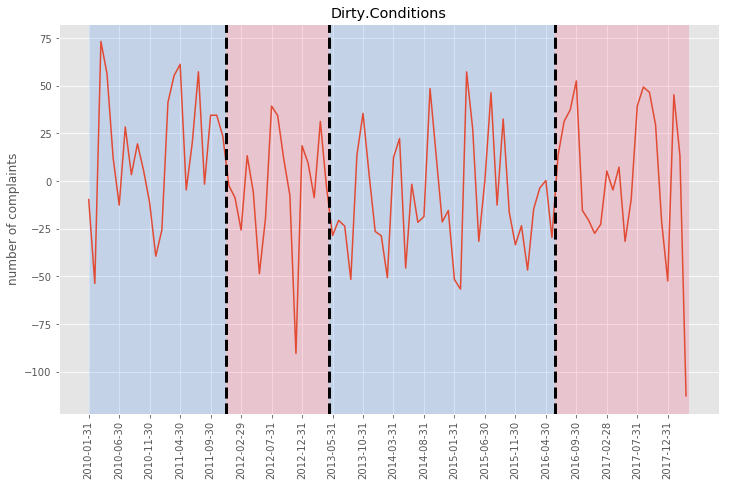

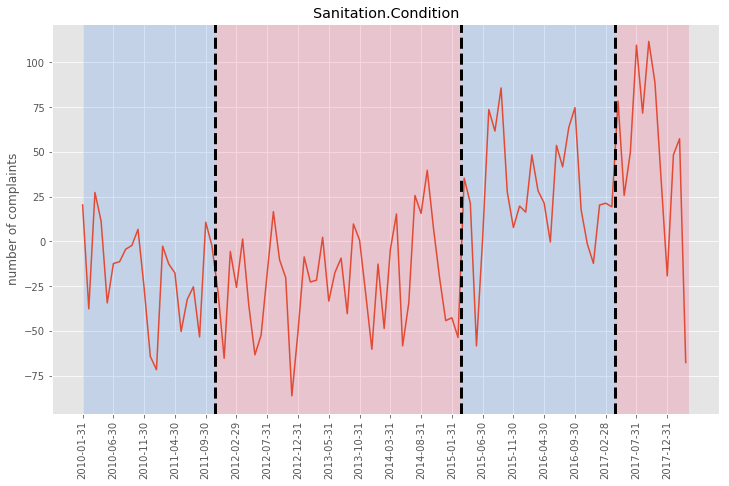

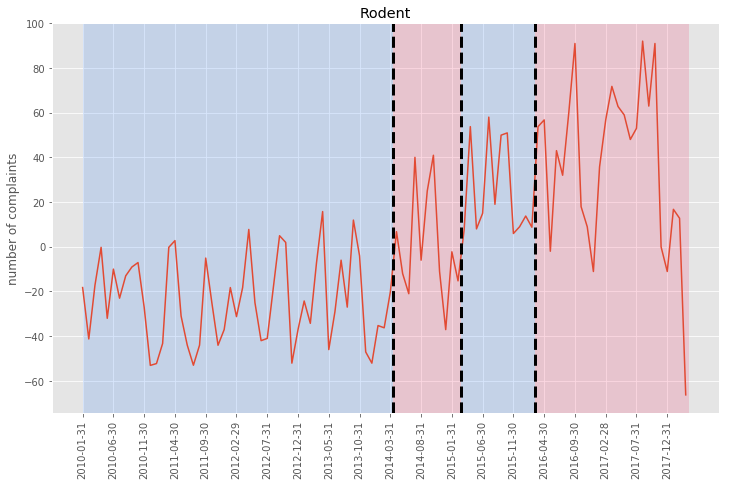

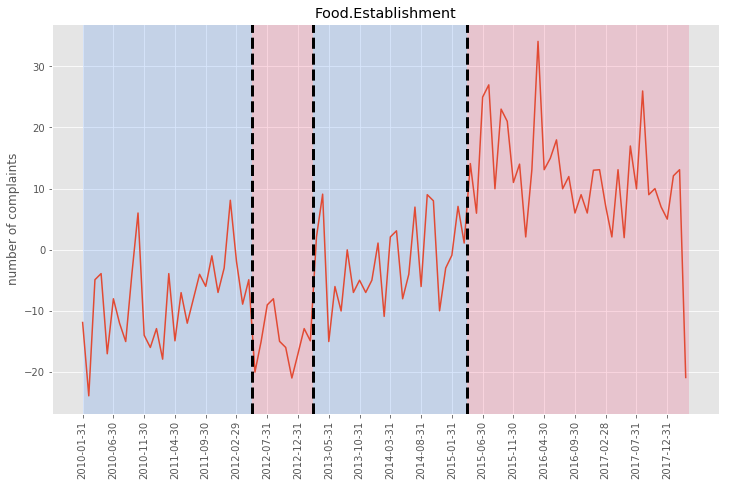

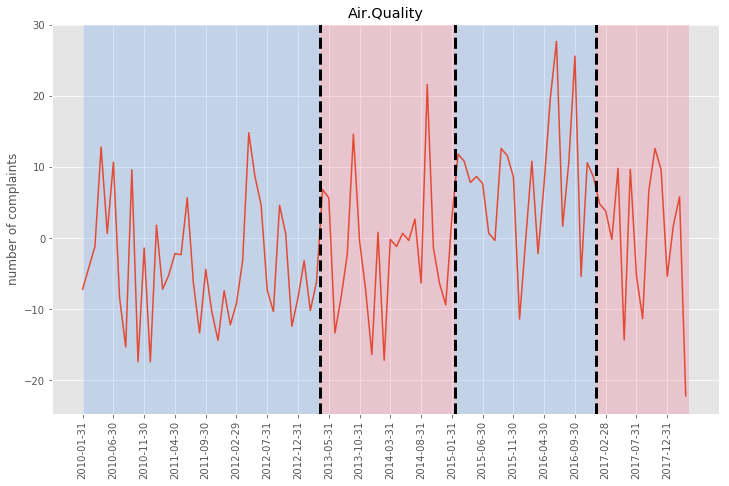

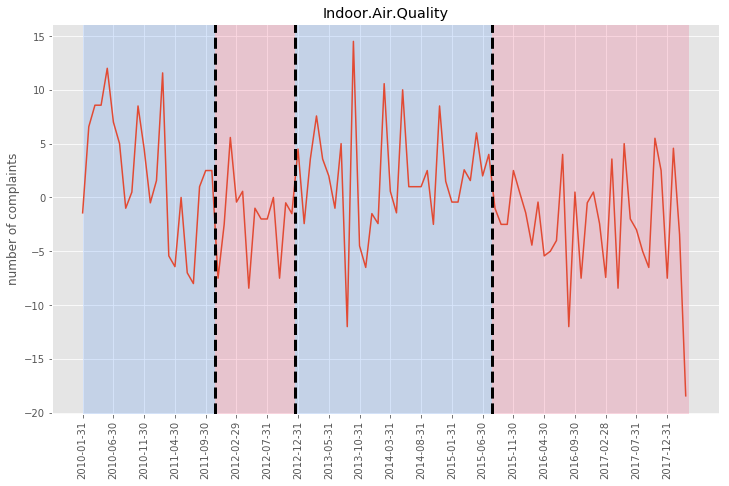

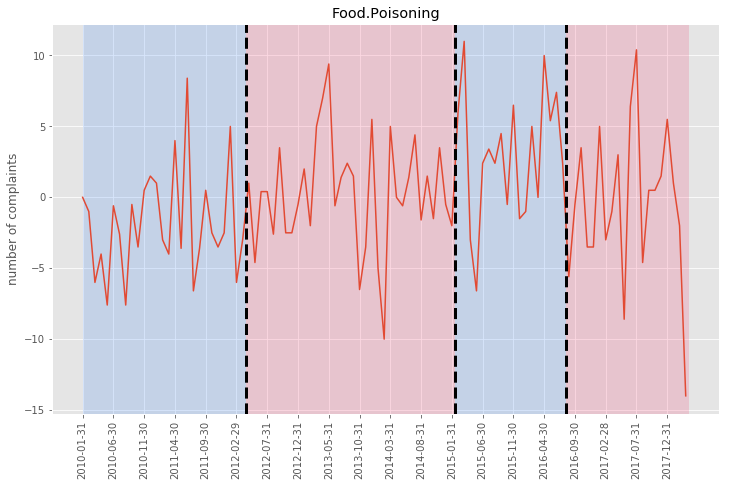

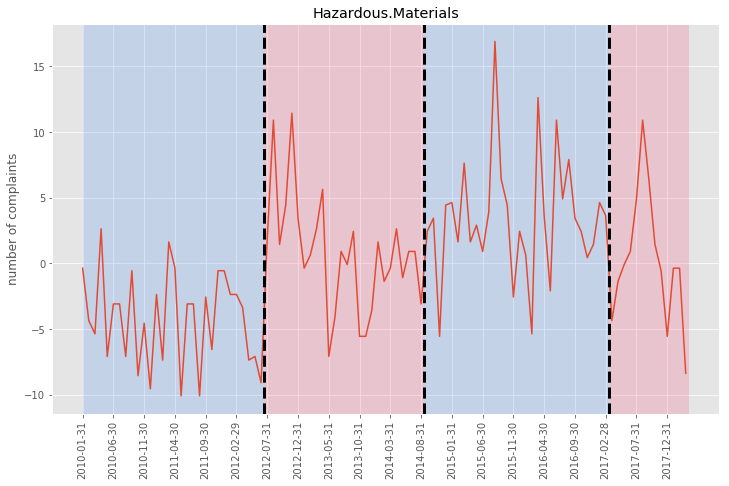

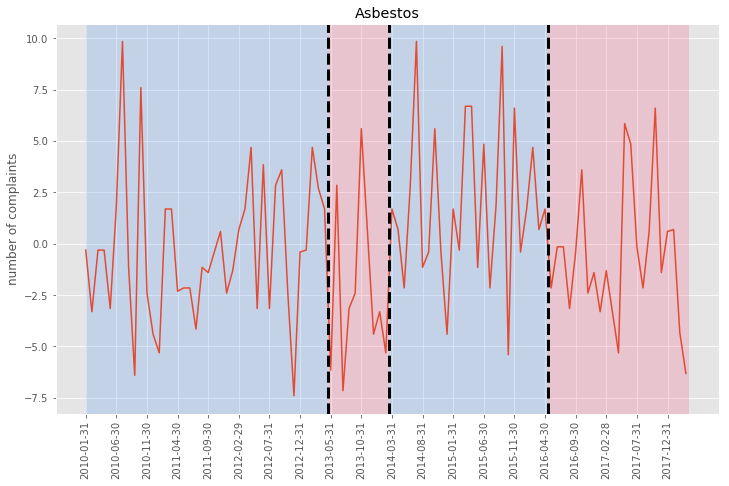

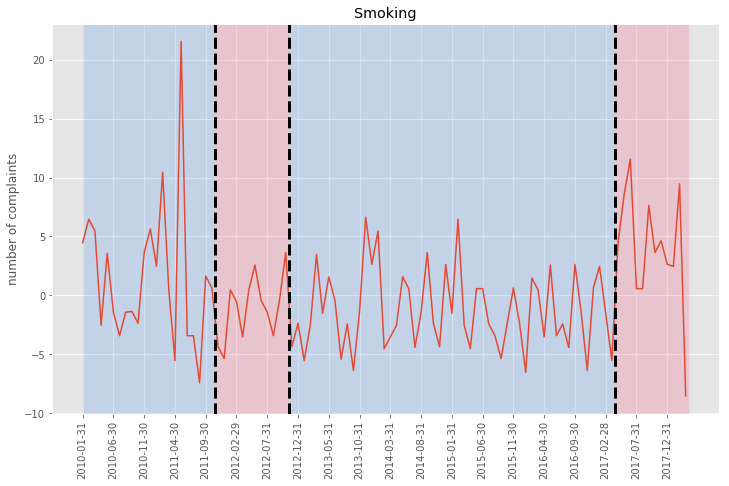

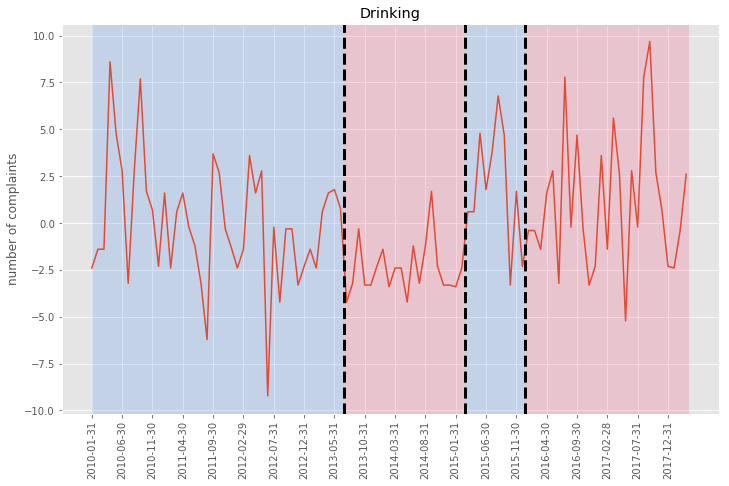

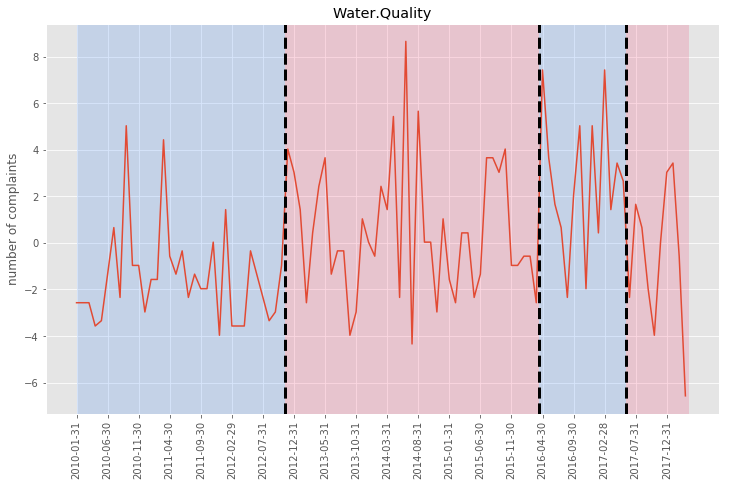

In [145]:
complaint_type_freq_bkps_filename = 'complaint_type_freq_bkps_filename.txt'
g = open(complaint_type_freq_bkps_filename, 'w')
for i in range(len(complaint_type)):
    category = complaint_type[i]
    signal = _311_service_requests_bkt[category]

    # change point detection
    model = "l1"  # "l2", "rbf"
    algo = rpt.Dynp(model=model, min_size=10, jump=1).fit(signal)
    my_bkps = algo.predict(n_bkps=3)
    
    g.write(category + '\t' + '\t'.join(list(map(str, my_bkps))) + '\n')

    # show results
    rpt.show.display(signal, my_bkps, my_bkps, figsize=(10, 6))
    plt.title(category)
    plt.ylabel('number of complaints')
    plt.xticks(range(0, len(date), 5), [date[i] for i in range(0,len(date),5)], rotation=90)
    plt.show()
    
g.close()

In [108]:
list(map(str, [1,2,3,4]))

['1', '2', '3', '4']

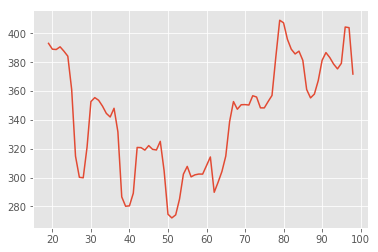

In [69]:
plt.style.use('ggplot')
plt.plot(signal.rolling(20).mean(),label= 'MA 9 days')
plt.show()

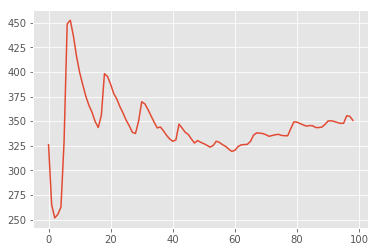

In [48]:
plt.plot(signal.ewm(com=100).mean())
plt.show()

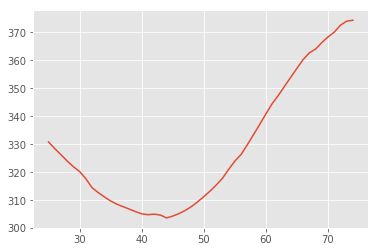

In [62]:
plt.plot(signal.rolling(window=50, win_type='gaussian', center=True).mean(std=10))
plt.show()

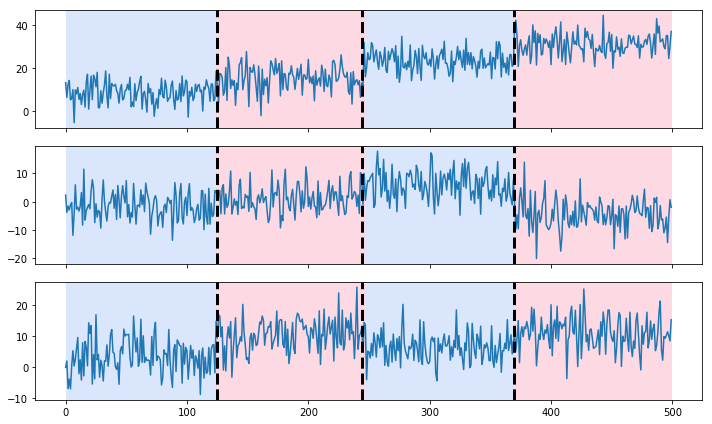

In [1]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

# creation of data
n, dim = 500, 3
n_bkps, sigma = 3, 5
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

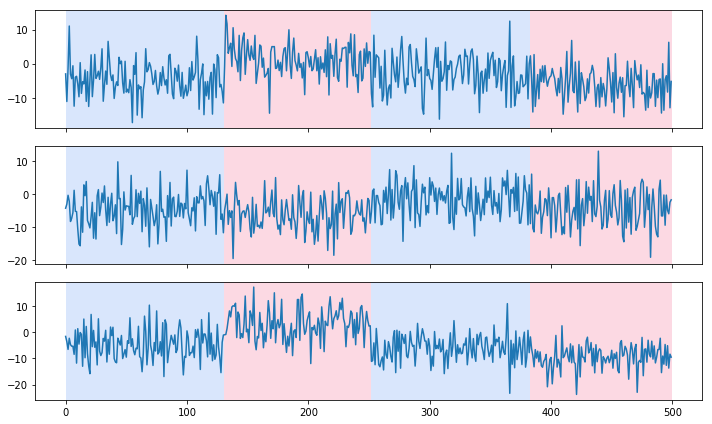

In [4]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt
# creation of data
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
rpt.display(signal, bkps)
plt.show()

[131, 252, 383, 500]